# NE470 Homework No. 4 #

## Problem 3 ##

This is an attempt to solve the for the function $f(x)$ by discretizing it into N nodes such that $$ f_n \approx f(n*\Delta x), \Delta x = W/n, n \in \{ 0, 1, \dots, N-1 \} $$ For this problem, $W=4$. Our boundary conditions are set as $$f(0)=2$$ and $$f(4)=54.61647$$

In [2]:
# numpy contains useful array/matrix tools
import numpy as np

The equation we are trying to solve is: $$ f^{\prime \prime} - f = 0 $$

Using the following approximation of the second derivative: 
    $$ f^{\prime\prime} \approx \frac{f_{n-1} - 2 f_{n} + f_{n+1}}{{\Delta x}^2} $$
    we arrive at an operator that approximately solves for $f$:
    $$ \left( \frac{1}{\Delta x ^2} \right) f_{i-1} + \left( \frac{-2}{\Delta x ^2} - 1 \right) f_i + \left( \frac{1}{\Delta x ^2} \right) f_{i+1} = b_i $$

Now we solve for $$\mathbf{A} f = b $$

In [3]:
def solution(N):
    # define our interval length
    deltaX = 4.0 / (N-1)
    deltaXsquared = deltaX ** 2
    
    # define our matrix
    diag = -2.0 / deltaXsquared - 1.0
    offdiag = 1.0 / deltaXsquared
    
    # instantiate matrix and fill diagonal values
    A = np.eye(N-2) * diag
    A = A + offdiag * np.diagflat(np.resize(np.array([1.0]), (N-3)), 1)
    A = A + offdiag * np.diagflat(np.resize(np.array([1.0]), (N-3)), -1)
    
    # define our output vector, b
    b = np.zeros(N-2)
    b[0] = -2.0 / deltaXsquared
    b[N-3] = -54.61647 / deltaXsquared
    
    # compute solution
    f = np.linalg.solve(A, b)
    
    return f

In [4]:
def analytic(N):
    """ The analytic solution to the equation """
    x = np.linspace(0, 4, num=N)
    x = x[1:-1]
    return np.exp(x) + np.exp(-x)

In [5]:
def error(n):
    return np.amax(np.abs(analytic(n) - solution(n)))

In [6]:
%%timeit
e_min = 10**-4
e=1.0

n_max = 10**5
n = 5

while e>e_min and n<n_max:
    n += 1
    e = error(n)
print "{0}\t\t{1}".format(n, e)

370		9.97073790181e-05
370		9.97073790181e-05
370		9.97073790181e-05
370		9.97073790181e-05
1 loop, best of 3: 605 ms per loop


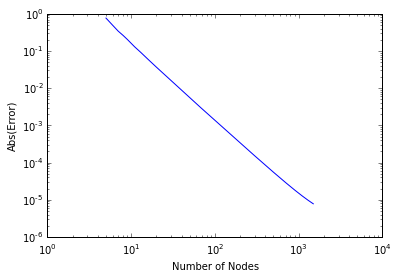

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt
n = np.arange(5, 1500)
plt.plot(n, [error(i) for i in n])
plt.yscale('log')
plt.xscale('log')
plt.xlabel('Number of Nodes')
plt.ylabel('Abs(Error)')
plt.show()

## Problem 5 ##

In [10]:
def sigma_tr(sigma_t, mu_0, sigma_s):
    # mu_0 is actually 1-mu_0 in my table
    mu_0 = 1 - mu_0
    
    return sigma_t - mu_0 * sigma_s

In [22]:
def diffusion_coefficient(sigma_t, mu_0, sigma_s):
    return (1.0 / 3.0) / sigma_tr(sigma_t, mu_0, sigma_s)

In [11]:
def z_0(sigma_t, mu_0, sigma_s):
    return 0.7104 / sigma_tr(sigma_t, mu_0, sigma_s)

Light water

In [12]:
sigma_tr(3.45, 0.676, 3.45)

2.3322000000000003

In [23]:
diffusion_coefficient(3.45, 0.676, 3.45)

0.1429265643312466

In [13]:
z_0(3.45, 0.676, 3.45)

0.30460509390275275

Heavy water

In [14]:
sigma_tr(0.449, 0.884, 0.449)

0.396916

In [25]:
diffusion_coefficient(0.449, 0.884, 0.449)

0.8398082549792231

In [15]:
z_0(0.449, 0.884, 0.449)

1.7897993530117204

Graphite

In [16]:
sigma_tr(0.385, 0.9444, 0.385)

0.36359400000000003

In [24]:
diffusion_coefficient(0.385, 0.9444, 0.385)

0.9167734707760119

In [17]:
z_0(0.385, 0.9444, 0.385)

1.953827620917837

Uranium

In [18]:
sigma_tr(0.765, 0.9972, 0.397)

0.7638884

In [26]:
diffusion_coefficient(0.765, 0.9972, 0.397)

0.4363639156365423

In [19]:
z_0(0.765, 0.9972, 0.397)

0.9299787770045991